## Sample Rate Impact Assessment
---

### Objective:
- To assess the impact of different sample rates on the performance of the model.
- To determine the optimal sample rate for the model.

### Methodology:
- A model (RF, SVM, LR) is trained with different features (Chroma, MFCC_30, MFCC_120, CQT_30, CQT_70) and sample rates (mixed, 4000). The features are used 'as extracted' without any additional processing.
- The model is trained with 80% of the data and tested with the remaining 20%.
  
#### Findings:
- No clear advantage of using a mix of frequencies over a fixed sample rate. Actually, a fixed sample rate of 4000Hz lead to a lower risk of bias introduction, to a better efficiency and allows to the usage of a larger variety of features.

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import tqdm.notebook as tqdm

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-paper')
import seaborn as sns
sns.set_theme(context="paper", font_scale=1)

### Set the Paths

In [20]:
# set the paths
BASE_DIR = '../dataset/'
LABELS = BASE_DIR + 'labels.csv'

# features
FEATURES_BASE = '../features/'
FEATURES = FEATURES_BASE + 'raw/'

### Load the Data and Train the Model

In [49]:
SEED = 42
full_data_dict_keys = ['artifacts', 'extrahls', 'murmurs', 'normals', 'extrastoles']
interval = 1
sample_rates = ['mix', 4000]
num_feats = [30, 120, 12, 30, 70]
type_ = ['mfcc', 'mfcc', 'chroma', 'cqt', 'cqt']

# dataframe where to store the results
results_rf = pd.DataFrame(columns=['mfcc_30', 'mfcc_120', 'chroma_12', 'cqt_30', 'cqt_70'], index=['mix', '4000'])
results_svm = pd.DataFrame(columns=['mfcc_30', 'mfcc_120', 'chroma_12', 'cqt_30', 'cqt_70'], index=['mix', '4000'])
results_lr = pd.DataFrame(columns=['mfcc_30', 'mfcc_120', 'chroma_12', 'cqt_30', 'cqt_70'], index=['mix', '4000'])

for sample_rate in sample_rates:
    for i, num_feat in enumerate(num_feats):
          print(f'Processing {sample_rate}hz_{num_feat}{type_[i]}')

          # define the features name and load the data
          FEATURES_NAME = f'full_data_{interval}s_{sample_rate}hz_{num_feat}{type_[i]}.npy'
          full_data = np.load(FEATURES + FEATURES_NAME, allow_pickle=True).item()
          
          # extract the data from the dict
          data_list = []
          for key in full_data_dict_keys:
               X = full_data[key]['X']
               y = full_data[key]['y']
               data = np.concatenate((X, y.reshape(-1, 1)), axis=1)
               data_list.append(data)
          full_data_array = np.concatenate(data_list, axis=0)
          
          # split the data into train and test
          X = full_data_array[:, :-1]
          y = full_data_array[:, -1]
          X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)
          
          print('Training random forest')
          # train the RF model
          clf = RandomForestClassifier(random_state=SEED)
          clf.fit(X_train, y_train)
          # evaluate the model
          score = clf.score(X_test, y_test)
          # store the results
          results_rf.iloc[sample_rates.index(sample_rate), i] = score
          
          print('Training SVM')
          # train the SVM
          clf = SVC(random_state=SEED)
          clf.fit(X_train, y_train)
          # evaluate the model
          score = clf.score(X_test, y_test)
          # store the results
          results_svm.iloc[sample_rates.index(sample_rate), i] = score
          
          print('Training logistic regression')
          # train the LR
          clf = LogisticRegression(random_state=SEED, max_iter=300)
          clf.fit(X_train, y_train)
          # evaluate the model
          score = clf.score(X_test, y_test)
          # store the results
          results_lr.iloc[sample_rates.index(sample_rate), i] = score
                
          
# save the results
results_rf.to_csv('results_rf.csv')
results_svm.to_csv('results_svm.csv')
results_lr.to_csv('results_lr.csv')

Processing mixhz_30mfcc
Training random forest
Training SVM
Training logistic regression


/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Processing mixhz_120mfcc
Training random forest
Training SVM
Training logistic regression


/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Processing mixhz_12chroma
Training random forest
Training SVM
Training logistic regression
Processing mixhz_30cqt
Training random forest
Training SVM
Training logistic regression
Processing mixhz_70cqt
Training random forest
Training SVM
Training logistic regression
Processing 4000hz_30mfcc
Training random forest
Training SVM
Training logistic regression


/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Processing 4000hz_120mfcc
Training random forest
Training SVM
Training logistic regression


/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Processing 4000hz_12chroma
Training random forest
Training SVM
Training logistic regression
Processing 4000hz_30cqt
Training random forest
Training SVM
Training logistic regression
Processing 4000hz_70cqt
Training random forest
Training SVM
Training logistic regression


Text(0.085, 0.5, 'Sample Rate')

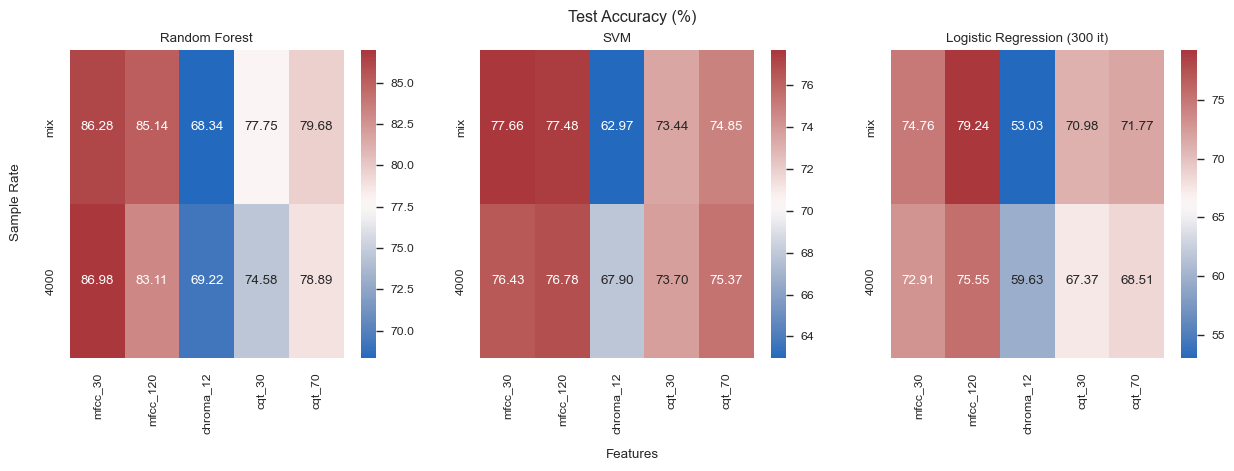

In [80]:
fig, axs = plt.subplots(1, 3, figsize=(15, 4))

sns.heatmap(results_rf.astype(float)*100, annot=True, cmap='vlag', fmt=".2f", ax=axs[0])
axs[0].set_title('Random Forest')

sns.heatmap(results_svm.astype(float)*100, annot=True, cmap='vlag', fmt=".2f", ax=axs[1])
axs[1].set_title('SVM')

sns.heatmap(results_lr.astype(float)*100, annot=True, cmap='vlag', fmt=".2f", ax=axs[2])
axs[2].set_title('Logistic Regression (300 it)')

fig.suptitle('Test Accuracy (%)')
# xlabel and ylabel for entire fig
fig.text(0.5, -0.14, 'Features', ha='center')
fig.text(0.085, 0.5, 'Sample Rate', va='center', rotation='vertical')

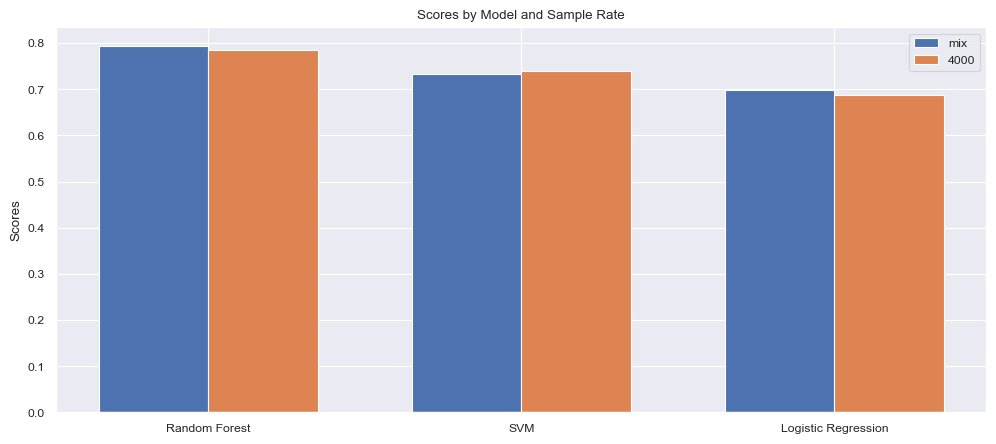

In [68]:
sr_mean_rf = results_rf.mean(axis=1)
sr_mean_svm = results_svm.mean(axis=1)
sr_mean_lr = results_lr.mean(axis=1)
df = pd.DataFrame([sr_mean_rf, sr_mean_svm, sr_mean_lr], index=['Random Forest', 'SVM', 'Logistic Regression'])
index = df.index

# Define the positions for each set of bars
bar_width = 0.35
x = np.arange(len(index))  # the label locations
x_mix = x - bar_width / 2
x_4000 = x + bar_width / 2

# Plot the data
fig, ax = plt.subplots(figsize=(12, 5))
mix = ax.bar(x_mix, df['mix'], bar_width, label='mix')
_4000 = ax.bar(x_4000, df['4000'], bar_width, label='4000')

# Add labels and legend
ax.set_ylabel('Scores')
ax.set_title('Scores by Model and Sample Rate')
ax.set_xticks(x)
ax.set_xticklabels(index)
ax.legend()

plt.show()
